<a href="https://colab.research.google.com/github/Wsouza36/Ciencia-de-Dados---PUC/blob/main/MVP_CD_An%C3%A1lise_Financeira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP de Análise de Dados e Boas Práticas**

## Aluno Welton Benedito de Souza

### MVP Análise de dados financeiros de empresas petroleiras Júniores em 2022

## **1. Definição do Problema**



O projeto é composto por datasets de demonstração e relatórios financeiros das empresas registradas na CVM (Comissão de Valores Mobiliários) e informações do mercado financeiro como número de ações em circulação e a cotação da ações no IBOVESPA. Objetivo do projeto é avaliar as alternativas de investimento em ações de empresas através de um estudo da situação financeira e das perpectivas das empresas. A utilização de um dos aspectos da análise fundamentalista para encontrar o valor real de uma empresa para investimento com foco no longo prazo.

As empresas selecionadas para análise, neste projeto, são empresas independentes de óleo e gás natural no Brasil, chamadas empresas **petroleiras júniores** ou **"Junior Oils"**.

As **"Junior Oils"** operam hoje em mais de 180 campos de exploração de petróleo e gás, tiveram um crescimento considerável impulsionado pela aquisição de ativos da Petrobras por meio do plano de desinvestimento inciado em 2015, ainda no Governo Dilma Rousseff. A produção em bacias terrestres, que estava em declínio desde 2012, passou aumentar substancialmente com a entrada dessas empresas, além revitalização de campos maduros de petróleo e gás natural offshore.

Os datasetes apresentam diversos atributos, variáveis preditoras, que contribue para o calculo dos diversos indicadores financeiros e econômicos, variavéis de respostas.

Para mais detalhes sobre este dataset, consulte:https://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/DFP/DADOS/dfp_cia_aberta_2022.zip

**Informações sobre os datasets:**
1. **DRE**   - Demonstração do Resultado do Exercício 
2. **BPA**   - Balanço Patrimonial do Ativo
3. **BPP**   - Balanço Patrimonial do Passivo
4. **yahoo** - Site do Yahoo Finance


**Informações sobre os atributos(variáveis preditoras):**
1. **DENOM_CIA**    - Denominação da empresa 
2. **CD_CVM**       - Código da empresa na CVM
3. **DT_INI_EXERC** - Data inicial do exercício 
4. **DT_FIM_EXERC** - Data final do exercício 
5. **CD_CONTA**     - Código da conta contábil 
6. **DS_CONTA**     - Descrição da conta contábil 
7. **VL_CONTA**     - Valor da conta 
8. **GRUPO_DFP**    - Grupo da Demonstração Financeira Patrimonial
9. **Close**        - Preços de fechamento da ação
10. **Quote**       - Número de ações de empresa

### 1.1 - Aplicação analítica

As diversas bibliotecas (Python Data Analysis Library) aplicadas para exploração e análise deste projeto

In [45]:
#Instalação de bibliotecas python

!pip install zipfile36
!pip install pandas
!pip install pandas-datareader
!pip install numpy
!pip install requests
!pip install plotly
!pip install yahoo_fin
!pip install fundamentus
!pip install matplotlib==3.5.3 
!pip install seaborn
!pip install missingno
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 61.4 MB/s eta 0:00:00
  Attempting uninstall: matp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [46]:
#Importação de bibliotecas
import zipfile
import io
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import numpy as np
import requests
import time
import plotly
import os
import plotly.graph_objects as go
import fundamentus
import pandas_datareader as pdr
from yahoo_fin import stock_info as si
import matplotlib as mpl
from matplotlib.patches import Patch, Polygon
from matplotlib.lines import Line2D
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import missingno as ms # para tratamento de missings
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")
import warnings
## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
## Transformações Categóricas
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding
import ydata_profiling as yp
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from pandas_profiling import ProfileReport

## **2. Carga de Dados**

### 2.1 - **Dados** da DRE





Através dos pacote zipfile, requests, pandas (Python Data Analysis Library) carregaremos um arquivo .csv da demonstração do resultado do exercício contido na arquivo zipado no github disponível online para exploração dos dados




In [4]:
arquivo= 'dfp_cia_aberta_DRE_ind_2022.csv'
link = r'https://github.com/Wsouza36/Ciencia-de-Dados---PUC/blob/main/dfp_cia_aberta_2022.zip?raw=true'
arquivo_zip = requests.get(link)
zp=zipfile.ZipFile(io.BytesIO(arquivo_zip.content))
zp
DRE=zp.open(arquivo)
linhas = DRE.readlines()
lines = [i.strip().decode('ISO-8859-1')for i in linhas]
lines = [i.split(';')for i in lines]
df_DRE = pd.DataFrame(lines[1:], columns = lines[0])

In [5]:

df_DRE.head()

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
0,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receitas de Intermediação Financeira,130254642.0000000000,S
1,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01,Receitas de Intermediação Financeira,229637958.0000000000,S
2,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01.01,Operações de Crédito,84254592.0000000000,N
3,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01.01,Operações de Crédito,113112904.0000000000,N
4,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01.02,Operações de Arrendamento Mercantil,0.0000000000,N


### 2.2 - Dados do BPA

Através dos pacote zipfile, requests, pandas (Python Data Analysis Library) carregaremos um arquivo .csv da balanço patrimonial do ativo contido na arquivo zipado no github disponível online para exploração dos dados

In [6]:
arquivo= 'dfp_cia_aberta_BPA_ind_2022.csv'
link = r'https://github.com/Wsouza36/Ciencia-de-Dados---PUC/blob/main/dfp_cia_aberta_2022.zip?raw=true'
arquivo_zip = requests.get(link)
zp=zipfile.ZipFile(io.BytesIO(arquivo_zip.content))
zp
BPA=zp.open(arquivo)
linhas = BPA.readlines()
lines = [i.strip().decode('ISO-8859-1')for i in linhas]
lines = [i.split(';')for i in lines]
df_BPA = pd.DataFrame(lines[1:], columns = lines[0])

In [7]:
df_BPA.head()

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
0,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1,Ativo Total,1988645574.0000000000,S
1,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1,Ativo Total,2062674549.0000000000,S
2,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1.01,Caixa e Equivalentes de Caixa,51538341.0000000000,S
3,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.01,Caixa e Equivalentes de Caixa,67891204.0000000000,S
4,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1.01.01,Caixa,15285225.0000000000,S


### 2.3 - Dados do BPP

Através dos pacote zipfile, requests, pandas (Python Data Analysis Library) carregaremos um arquivo .csv do balanço patrimonial do passivo contido na arquivo zipado no github disponível online para exploração dos dados

In [8]:
arquivo= 'dfp_cia_aberta_BPP_ind_2022.csv'
link = r'https://github.com/Wsouza36/Ciencia-de-Dados---PUC/blob/main/dfp_cia_aberta_2022.zip?raw=true'
arquivo_zip = requests.get(link)
zp=zipfile.ZipFile(io.BytesIO(arquivo_zip.content))
zp
BPP=zp.open(arquivo)
linhas = BPP.readlines()
lines = [i.strip().decode('ISO-8859-1')for i in linhas]
lines = [i.split(';')for i in lines]
df_BPP = pd.DataFrame(lines[1:], columns = lines[0])

In [9]:
df_BPP.head()

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
0,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2,Passivo Total,1988645574.0000000000,S
1,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2,Passivo Total,2062674549.0000000000,S
2,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2.01,Passivos Financeiros Avaliados ao Valor Justo ...,4108597.0000000000,S
3,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.01,Passivos Financeiros Avaliados ao Valor Justo ...,3512533.0000000000,S
4,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2.01.01,Instrumentos financeiros derivativos,4108597.0000000000,N


## **3. Análise de Dados**

### 3.1. Estatísticas Descritivas

Exame das dimensões do dataset e suas informações 

#### 3.1.1 Dimensões do datasets

In [10]:
# Mostra as dimensões do dataset
DP = pd.DataFrame({
    'Dataframe': ['df_DRE', 'df_BPA', 'df_BPP'],
    'Linhas': [df_DRE.shape[0], df_BPA.shape[0], df_BPP.shape[0]],
    'Colunas': [df_DRE.shape[1], df_BPA.shape[1], df_BPP.shape[1]]})
DP

,Dataframe,Linhas,Colunas
0,df_DRE,44666,15
1,df_BPA,89951,14
2,df_BPP,151884,14


#### 3.1.2 Informações dos datasets

In [11]:
# Mostra as informações do dataset
print(df_DRE.info())
print(df_BPA.info())
print(df_BPP.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44666 entries, 0 to 44665
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CNPJ_CIA       44666 non-null  object
 1   DT_REFER       44666 non-null  object
 2   VERSAO         44666 non-null  object
 3   DENOM_CIA      44666 non-null  object
 4   CD_CVM         44666 non-null  object
 5   GRUPO_DFP      44666 non-null  object
 6   MOEDA          44666 non-null  object
 7   ESCALA_MOEDA   44666 non-null  object
 8   ORDEM_EXERC    44666 non-null  object
 9   DT_INI_EXERC   44666 non-null  object
 10  DT_FIM_EXERC   44666 non-null  object
 11  CD_CONTA       44666 non-null  object
 12  DS_CONTA       44666 non-null  object
 13  VL_CONTA       44666 non-null  object
 14  ST_CONTA_FIXA  44666 non-null  object
dtypes: object(15)
memory usage: 5.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89951 entries, 0 to 89950
Data columns (total 14 columns):
 #   

#### 3.1.3 - 10 primeiras linhas de cada dataset

In [12]:
# Mostra as 10 primeiras linhas de cada dataset_DRE
df_DRE.head(10)


,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
0,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receitas de Intermediação Financeira,130254642.0000000000,S
1,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01,Receitas de Intermediação Financeira,229637958.0000000000,S
2,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01.01,Operações de Crédito,84254592.0000000000,N
3,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01.01,Operações de Crédito,113112904.0000000000,N
4,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01.02,Operações de Arrendamento Mercantil,0.0000000000,N
5,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01.02,Operações de Arrendamento Mercantil,0.0000000000,N
6,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01.03,Resultado de Operações com TVM,42786793.0000000000,N
7,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01.03,Resultado de Operações com TVM,109331847.0000000000,N
8,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01.04,Resultado de IFD,1257206.0000000000,N
9,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01.04,Resultado de IFD,-883493.0000000000,N


In [13]:
# Mostra as 10 primeiras linhas de cada dataset_BPA

df_BPA.head(10)


,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
0,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1,Ativo Total,1988645574.0000000000,S
1,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1,Ativo Total,2062674549.0000000000,S
2,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1.01,Caixa e Equivalentes de Caixa,51538341.0000000000,S
3,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.01,Caixa e Equivalentes de Caixa,67891204.0000000000,S
4,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1.01.01,Caixa,15285225.0000000000,S
5,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.01.01,Caixa,12808085.0000000000,S
6,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1.01.02,Aplicações de Liquidez,36253116.0000000000,S
7,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.01.02,Aplicações de Liquidez,55083119.0000000000,S
8,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1.02,Ativos Financeiros,1798690748.0000000000,S
9,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.02,Ativos Financeiros,1841073746.0000000000,S


In [14]:
# Mostra as 10 primeiras linhas de cada dataset_BPP

df_BPP.head(10)

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
0,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2,Passivo Total,1988645574.0000000000,S
1,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2,Passivo Total,2062674549.0000000000,S
2,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2.01,Passivos Financeiros Avaliados ao Valor Justo ...,4108597.0000000000,S
3,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.01,Passivos Financeiros Avaliados ao Valor Justo ...,3512533.0000000000,S
4,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2.01.01,Instrumentos financeiros derivativos,4108597.0000000000,N
5,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.01.01,Instrumentos financeiros derivativos,3512533.0000000000,N
6,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2.02,Passivos Financeiros ao Custo Amortizado,1771550882.0000000000,S
7,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.02,Passivos Financeiros ao Custo Amortizado,1833280625.0000000000,S
8,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2.02.01,Depósitos,1771550882.0000000000,S
9,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.02.01,Depósitos,1833280625.0000000000,S


#### 3.1.4 - 10 últimas linhas de cada dataset

In [15]:
# Mostra as 10 últimas linhas do dataset_DRE
df_DRE.tail(10)

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
44656,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.99,Lucro por Ação - (Reais / Ação),0.0000000000,N
44657,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.99,Lucro por Ação - (Reais / Ação),0.0000000000,N
44658,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.99.01,Lucro Básico por Ação,0.0000000000,N
44659,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.99.01,Lucro Básico por Ação,0.0000000000,N
44660,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.99.01.01,ON,2.4903000000,N
44661,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.99.01.01,ON,1.0178000000,N
44662,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.99.02,Lucro Diluído por Ação,0.0000000000,N
44663,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.99.02,Lucro Diluído por Ação,0.0000000000,N
44664,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.99.02.01,ON,2.4754000000,N
44665,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.99.02.01,ON,1.0144000000,N


In [16]:
# Mostra as 10 últimas linhas do dataset_BPA
df_BPA.tail(10)

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
89941,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1.02.04.01.04,Goodwill na Aquisição da Satipel em 2009,45503.0000000000,N
89942,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.02.04.01.04,Goodwill na Aquisição da Satipel em 2009,45503.0000000000,N
89943,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1.02.04.01.05,Goodwill de Empresa Incorporada em 2010,0.0000000000,N
89944,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.02.04.01.05,Goodwill de Empresa Incorporada em 2010,0.0000000000,N
89945,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1.02.04.01.06,Goodwill de Empresa Incorporada em 2011,0.0000000000,N
89946,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.02.04.01.06,Goodwill de Empresa Incorporada em 2011,0.0000000000,N
89947,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1.02.04.01.07,Goodwill de Empresa Incorporada em 2012,2402.0000000000,N
89948,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.02.04.01.07,Goodwill de Empresa Incorporada em 2012,2402.0000000000,N
89949,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1.02.04.01.08,Goodwill de Empresa Incorporada em 2014,0.0000000000,N
89950,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.02.04.01.08,Goodwill de Empresa Incorporada em 2014,0.0000000000,N


In [17]:
# Mostra as 10 últimas linhas do dataset_BPP
df_BPP.tail(10)

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
151874,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2.03.04.09,Ações em Tesouraria,-103113.0000000000,S
151875,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.03.04.09,Ações em Tesouraria,-378017.0000000000,S
151876,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2.03.05,Lucros/Prejuízos Acumulados,0.0000000000,S
151877,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.03.05,Lucros/Prejuízos Acumulados,0.0000000000,S
151878,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2.03.06,Ajustes de Avaliação Patrimonial,681368.0000000000,S
151879,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.03.06,Ajustes de Avaliação Patrimonial,532105.0000000000,S
151880,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2.03.07,Ajustes Acumulados de Conversão,0.0000000000,S
151881,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.03.07,Ajustes Acumulados de Conversão,0.0000000000,S
151882,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2.03.08,Outros Resultados Abrangentes,0.0000000000,S
151883,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.03.08,Outros Resultados Abrangentes,0.0000000000,S


#### 3.1.5 - Resumo estatístico

In [18]:
# Faz um resumo estatístico do dataset_DRE
df_DRE.describe()

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
count,44666,44666,44666,44666,44666,44666,44666,44666,44666,44666,44666,44666,44666,44666,44666
unique,683,5,4,683,683,1,1,2,2,19,9,225,1592,21808,2
top,15.144.017/0001-90,2022-12-31,1,CIA SEGUROS ALIANCA DA BAHIA,003115,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2021-12-31,3.01,ON,0.0000000000,S
freq,142,43776,38390,142,142,44666,44666,42462,22347,21818,21994,1367,2164,16529,31569


In [19]:
# Faz um resumo estatístico do dataset_BPA
df_BPA.describe()

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
count,89951,89951,89951,89951,89951,89951,89951,89951,89951,89951,89951,89951,89951,89951
unique,683,5,4,683,683,1,1,2,2,9,355,2088,24080,2
top,26.345.998/0001-50,2022-12-31,1,TC S.A.,026077,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2021-12-31,1,Despesas Antecipadas,0.0000000000,S
freq,248,87965,77531,248,248,89951,89951,85644,45004,44199,1367,2690,51932,70110


In [20]:
# Faz um resumo estatístico do dataset_BPP
df_BPP.describe()

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
count,151884,151884,151884,151884,151884,151884,151884,151884,151884,151884,151884,151884,151884,151884
unique,683,5,4,683,683,1,1,2,2,9,423,3445,31918,2
top,26.345.998/0001-50,2022-12-31,1,TC S.A.,026077,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2021-12-31,2,Empréstimos e Financiamentos,0.0000000000,S
freq,436,148660,131054,436,436,151884,151884,144388,75993,74671,1367,5162,101224,133419


### 3.2. Visualizações Unimodais e Multimoldais

As visualizações unimodais e multimoldais não são aplicaveis nestes datasets da Demonstração do Resultado do Exercíco e Balanço Patrimonial. Visualiazões serão apresentada posteriormente numa amostragem e com seleções de características (feature selection).

## **4. Pré-Processamento de dados**

---



### 4.1. Tratamento de Missings e Limpeza

Estes datsets não tem missings e o valores "0" que parecem ser missings, também não pode ser considerados visto que são informações contábeis informada por cada empresas a CVM.


In [21]:
# verificando nulls no dataset
df_DRE.isnull().sum()
df_BPA.isnull().sum()
df_BPP.isnull().sum()


CNPJ_CIA         0
DT_REFER         0
VERSAO           0
DENOM_CIA        0
CD_CVM           0
GRUPO_DFP        0
MOEDA            0
ESCALA_MOEDA     0
ORDEM_EXERC      0
DT_FIM_EXERC     0
CD_CONTA         0
DS_CONTA         0
VL_CONTA         0
ST_CONTA_FIXA    0
dtype: int64

Considerando que o valores zero "0" são missings. Através de uma nova visão do dataset da Demonstração do Resultado trataremos os "missings"

<Axes: >

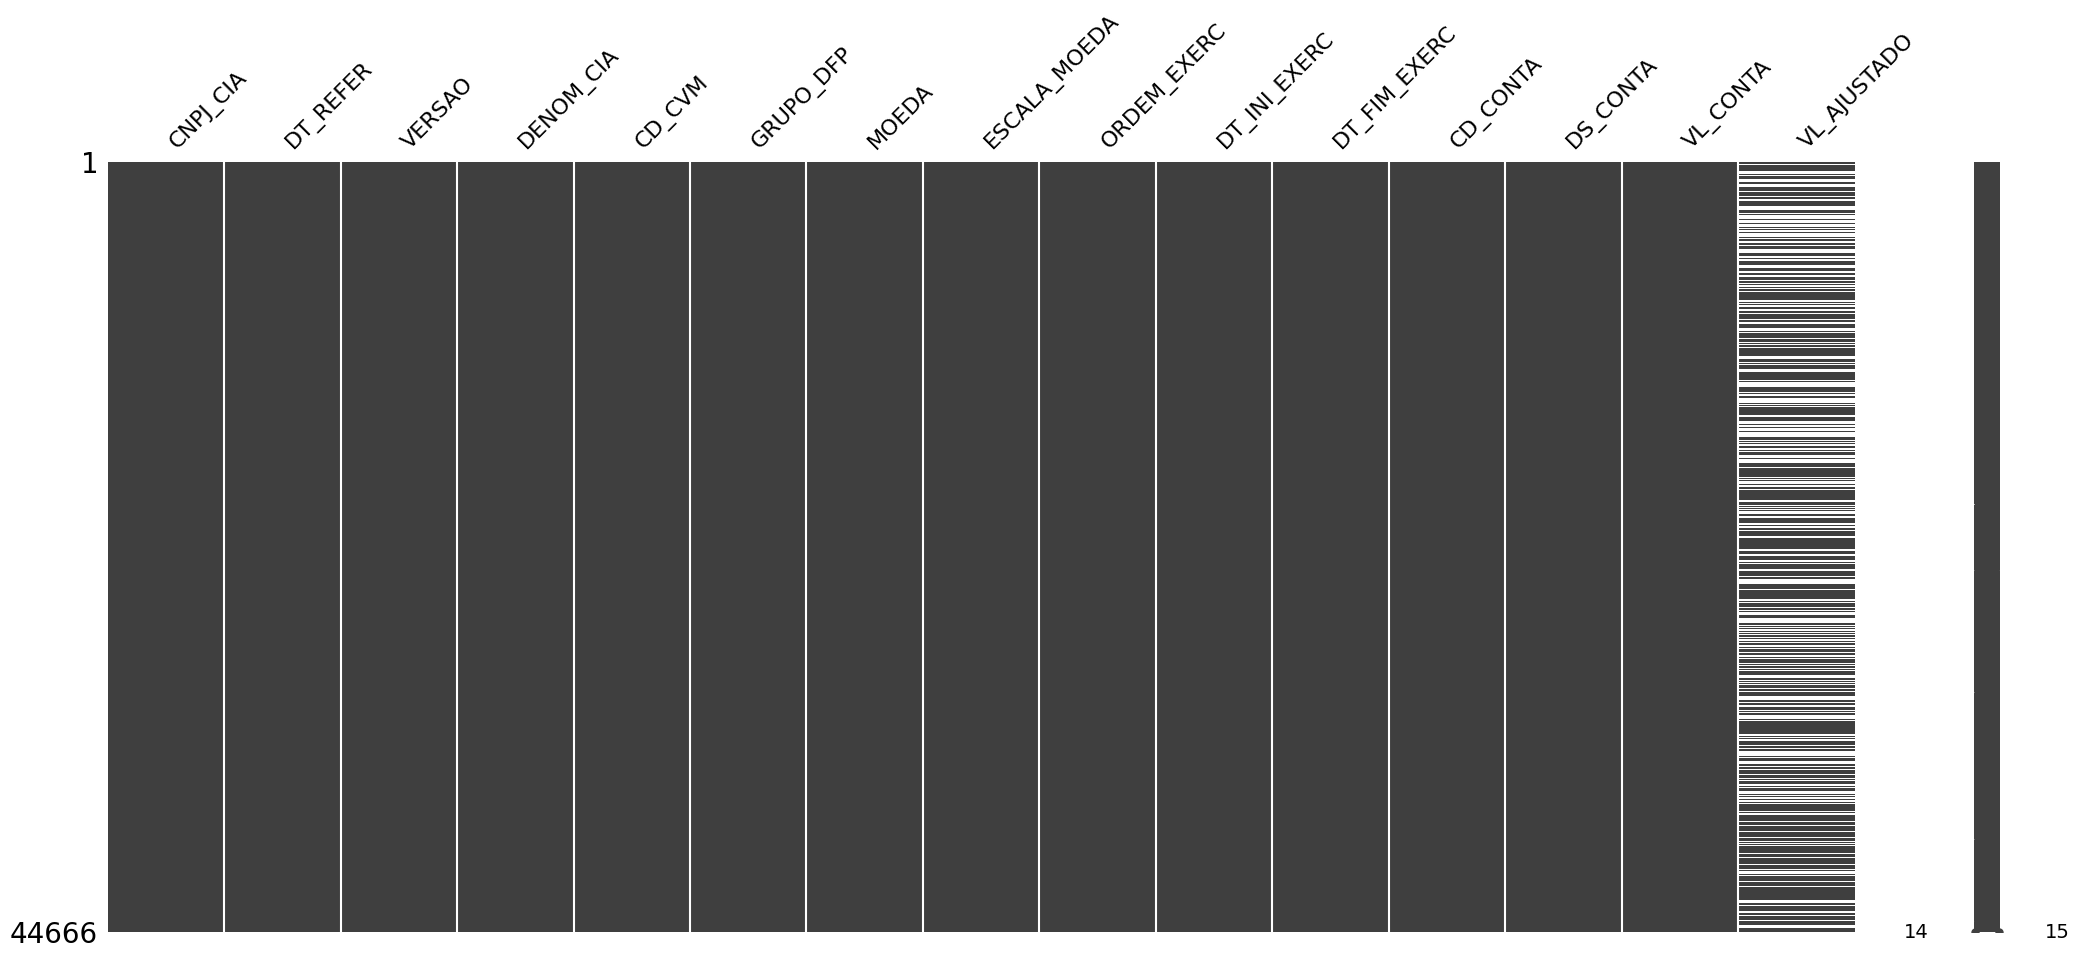

In [22]:
# recuperando os nomes das colunas
col = list(df_DRE.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = df_DRE[col[0:-1]]
atributos['VL_AJUSTADO'] = pd.to_numeric(atributos['VL_CONTA'])
# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

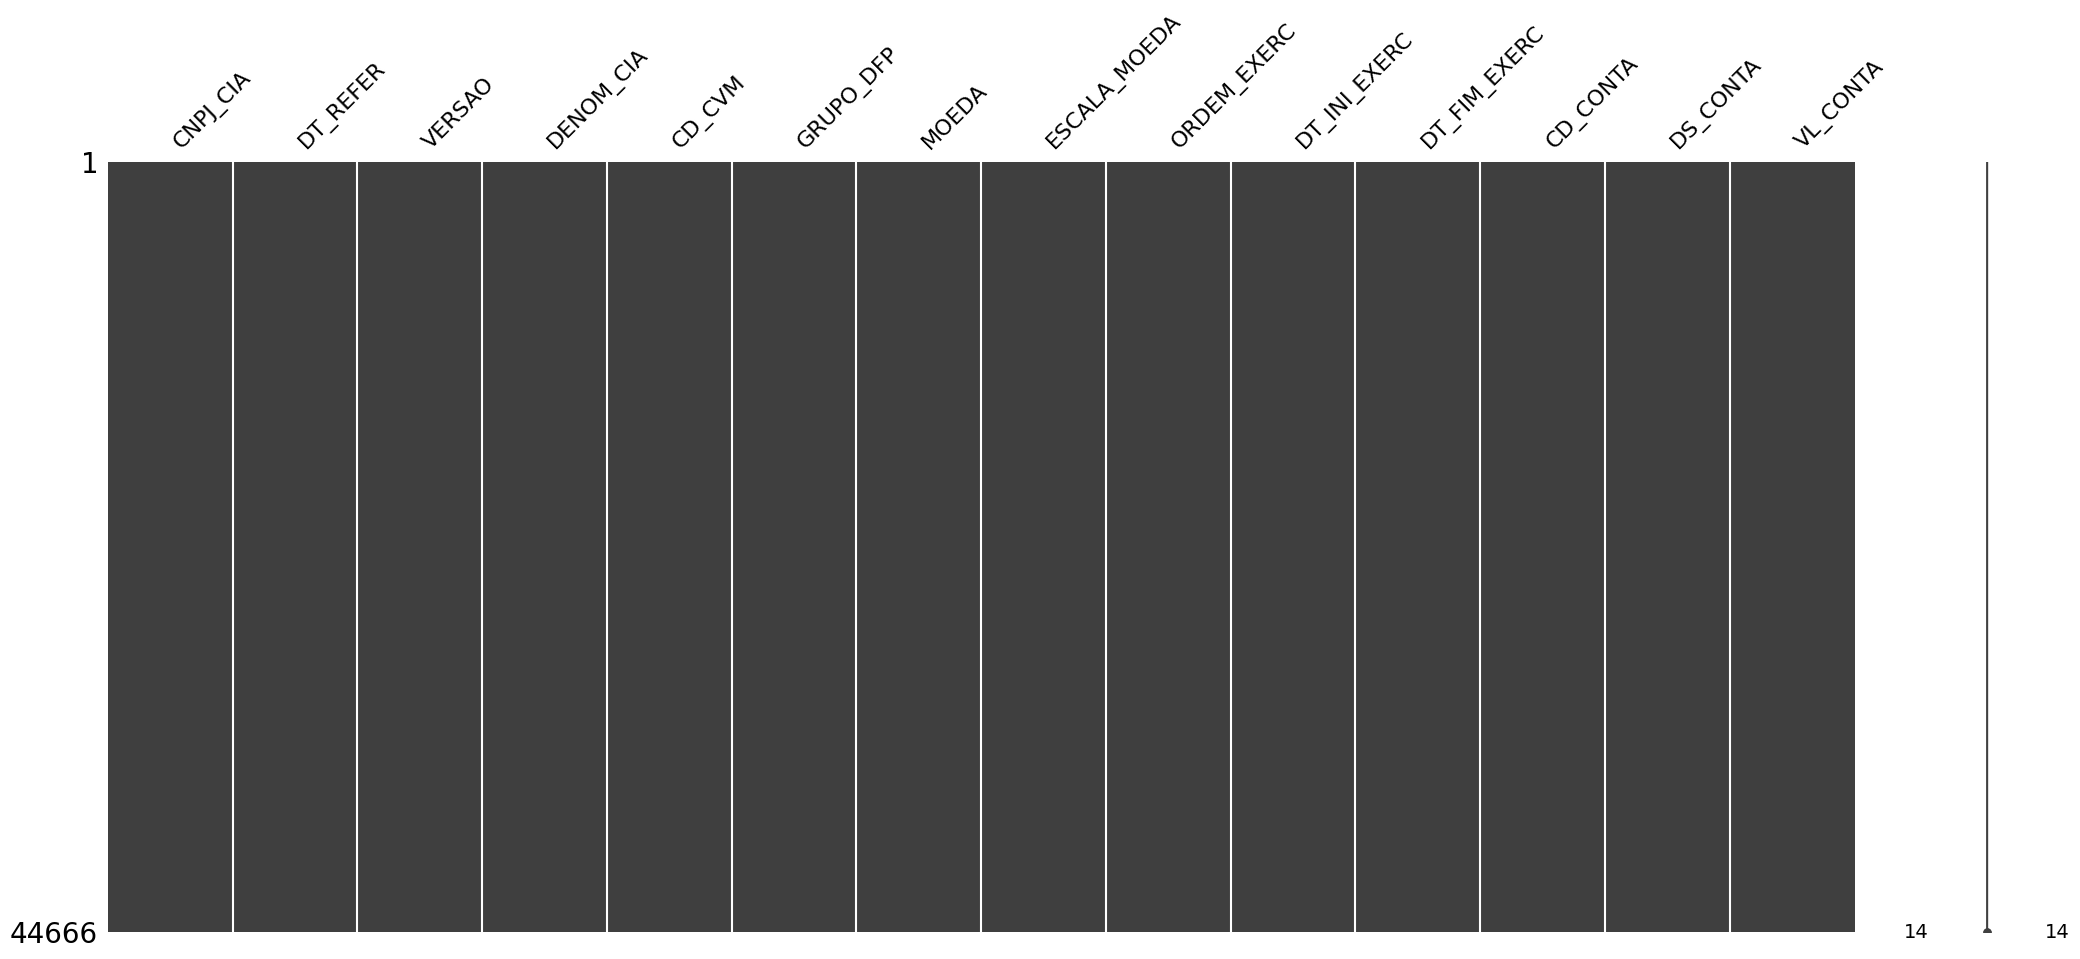

In [23]:
# removendo as colunas ''VL_AJUSTADO'
atributos.drop(['VL_AJUSTADO'], axis=1, inplace= True)
# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)


<Axes: >

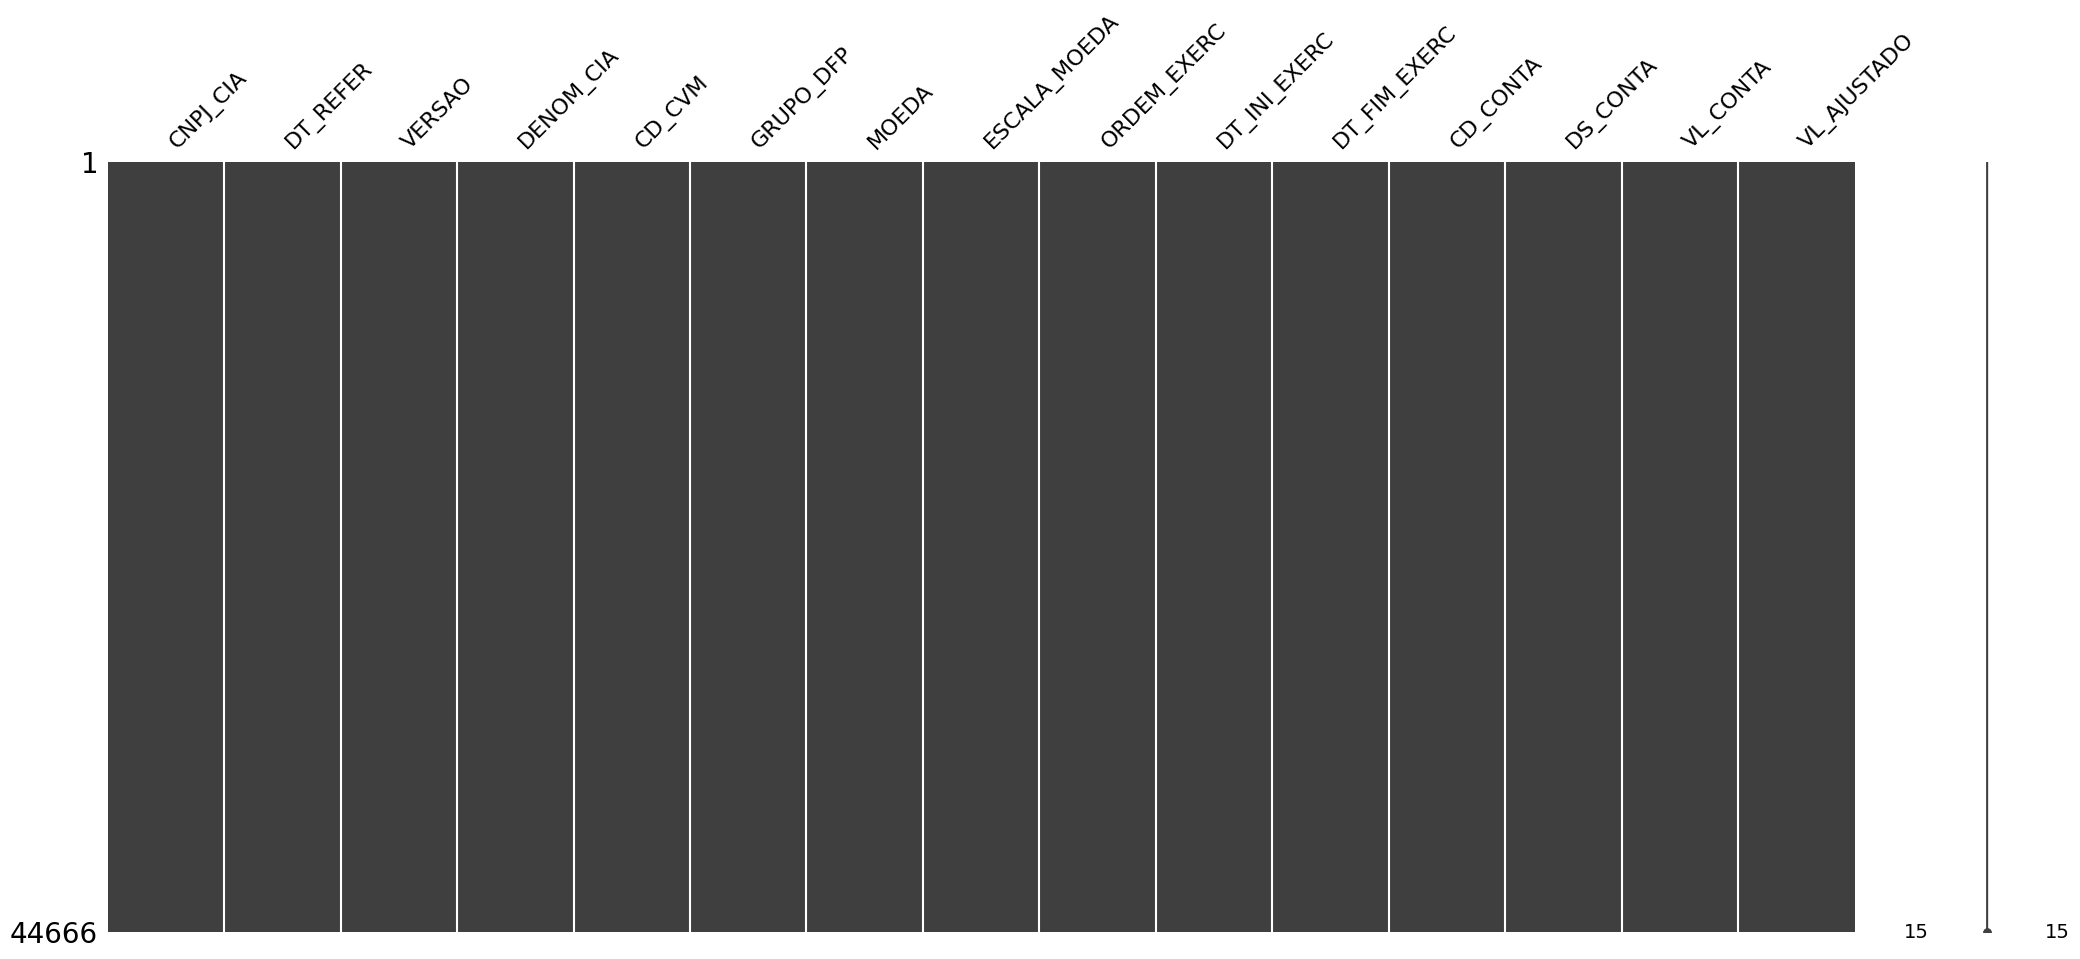

In [24]:
# recuperando os nomes das colunas
col = list(df_DRE.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = df_DRE[col[0:-1]]
# transformando objeto da coluna 'VL_CONTA' em valor em outra coluna chamada 'VL_AJUSTADO' 
atributos['VL_AJUSTADO'] = pd.to_numeric(atributos['VL_CONTA'])
# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# substituindo os NaN de 'preg' por 0
atributos['VL_AJUSTADO'].fillna(0, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

### 4.2. Amostragem



Nesta etapa apresentaremos as empresas selecionadas para análise, neste projeto, são empresas independentes de óleo e gás natural no Brasil, chamadas empresas petroleiras júniores ou "Junior Oils".

In [25]:
#Seleção das demonstrações financeiras das "Junior Oil" para o ano de 2022

#Remover demais demonstrações,manter somente DRE, BPA e BPA
demonstrativos = ['BPA','DRE','BPP']

#Seleção através do CD_CVM(código da CVM) 
empresas = ['25291', '22365', '22187', '25780']

lista_listas = []


for j in empresas:
    
    c = 0
    
    lista_df=[]

    for k in demonstrativos:


        link = r'https://github.com/Wsouza36/Ciencia-de-Dados---PUC/blob/main/dfp_cia_aberta_2022.zip?raw=true'

        arquivo_zip = requests.get(link)

        zp=zipfile.ZipFile(io.BytesIO(arquivo_zip.content))

        arquivo1= 'dfp_cia_aberta_' + str(k) + '_con_2022.csv'

        dados=zp.open(arquivo1)

        linhas = dados.readlines()

        lines = [i.strip().decode('ISO-8859-1')for i in linhas]

        lines = [i.split(';')for i in lines]
        
        c += 1
        
        df = pd.DataFrame(lines[1:], columns = lines[0])         

        df['VL_AJUSTADO'] = pd.to_numeric(df['VL_CONTA'], downcast='float')
        
        df['DT_FIM_EXERC'] = pd.to_datetime(df['DT_FIM_EXERC'], dayfirst=True)
        
        filtro = df[(df['CD_CVM'] == '0'+ str(j)) & (df['DT_FIM_EXERC'] >= '2022-01-01')]
                 
        lista_df.append(filtro) 
            
        print(f'Trabalhando com a empresa {j} e seu demostrantivo {k}. As dimensões são {filtro.shape}')
                 
    lista_listas.append(lista_df)

Trabalhando com a empresa 25291 e seu demostrantivo BPA. As dimensões são (69, 15)
Trabalhando com a empresa 25291 e seu demostrantivo DRE. As dimensões são (36, 16)
Trabalhando com a empresa 25291 e seu demostrantivo BPP. As dimensões são (117, 15)
Trabalhando com a empresa 22365 e seu demostrantivo BPA. As dimensões são (65, 15)
Trabalhando com a empresa 22365 e seu demostrantivo DRE. As dimensões são (36, 16)
Trabalhando com a empresa 22365 e seu demostrantivo BPP. As dimensões são (122, 15)
Trabalhando com a empresa 22187 e seu demostrantivo BPA. As dimensões são (65, 15)
Trabalhando com a empresa 22187 e seu demostrantivo DRE. As dimensões são (41, 16)
Trabalhando com a empresa 22187 e seu demostrantivo BPP. As dimensões são (117, 15)
Trabalhando com a empresa 25780 e seu demostrantivo BPA. As dimensões são (70, 15)
Trabalhando com a empresa 25780 e seu demostrantivo DRE. As dimensões são (36, 16)
Trabalhando com a empresa 25780 e seu demostrantivo BPP. As dimensões são (119, 15)


In [26]:
#Preparar a demonstração do resultado do exercício

df_demonstrativo_DRE = pd.concat([pd.concat(lista_df) for lista_df in lista_listas], axis=0)
dre = df_demonstrativo_DRE[df_demonstrativo_DRE['GRUPO_DFP'] == 'DF Consolidado - Demonstração do Resultado']
dre

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA,VL_AJUSTADO,DT_INI_EXERC
11981,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-12-31,3.01,Receita de Venda de Bens e/ou Serviços,1722422.0000000000,S,1722422.0,2022-01-01
11983,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-12-31,3.02,Custo dos Bens e/ou Serviços Vendidos,-835544.0000000000,S,-835544.0,2022-01-01
11985,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-12-31,3.03,Resultado Bruto,886878.0000000000,S,886878.0,2022-01-01
11987,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-12-31,3.04,Despesas/Receitas Operacionais,-615821.0000000000,S,-615821.0,2022-01-01
11989,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-12-31,3.04.01,Despesas com Vendas,0.0000000000,S,0.0,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4237,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-12-31,3.11.01,Atribuído a Sócios da Empresa Controladora,1153391.0000000000,S,1153391.0,2022-01-01
4239,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-12-31,3.11.02,Atribuído a Sócios Não Controladores,0.0000000000,S,0.0,2022-01-01
4241,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-12-31,3.99,Lucro por Ação - (Reais / Ação),0.0000000000,N,0.0,2022-01-01
4243,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-12-31,3.99.01,Lucro Básico por Ação,0.0000000000,N,0.0,2022-01-01


In [27]:
#Preparar o balanço patrimonial do ativo

df_demonstrativo_BPA = pd.concat([pd.concat(lista_df) for lista_df in lista_listas], axis=0)
bpa = df_demonstrativo_BPA[df_demonstrativo_BPA['GRUPO_DFP'] == 'DF Consolidado - Balanço Patrimonial Ativo']
bpa 

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA,VL_AJUSTADO,DT_INI_EXERC
23143,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1,Ativo Total,7971135.0000000000,S,7971135.0,NaN
23145,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.01,Ativo Circulante,1570700.0000000000,S,1570700.0,NaN
23147,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.01.01,Caixa e Equivalentes de Caixa,800442.0000000000,S,800442.0,NaN
23149,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.01.02,Aplicações Financeiras,31353.0000000000,S,31353.0,NaN
23151,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.01.02.01,Aplicações Financeiras Avaliadas a Valor Justo...,0.0000000000,S,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7871,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.02.04,Intangível,11997.0000000000,S,11997.0,NaN
7873,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.02.04.01,Intangíveis,11997.0000000000,S,11997.0,NaN
7875,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.02.04.01.01,Contrato de Concessão,0.0000000000,S,0.0,NaN
7877,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.02.04.01.02,Intangível,11997.0000000000,N,11997.0,NaN


In [28]:
#Preparar o balanço patrimonial do passivo

df_demonstrativo_BPP = pd.concat([pd.concat(lista_df) for lista_df in lista_listas], axis=0)
bpp = df_demonstrativo_BPP[df_demonstrativo_BPP['GRUPO_DFP'] == 'DF Consolidado - Balanço Patrimonial Passivo']
bpp 

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA,VL_AJUSTADO,DT_INI_EXERC
39801,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2,Passivo Total,7971135.0000000000,S,7971135.0,NaN
39803,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.01,Passivo Circulante,891485.0000000000,S,891485.0,NaN
39805,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.01.01,Obrigações Sociais e Trabalhistas,55946.0000000000,S,55946.0,NaN
39807,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.01.01.01,Obrigações Sociais,0.0000000000,S,0.0,NaN
39809,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.01.01.02,Obrigações Trabalhistas,55946.0000000000,S,55946.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13251,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.03.06.01,Ajustes de Avaliação Patrimonial,-255811.0000000000,N,-255811.0,NaN
13253,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.03.07,Ajustes Acumulados de Conversão,0.0000000000,S,0.0,NaN
13255,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.03.08,Outros Resultados Abrangentes,34481.0000000000,S,34481.0,NaN
13257,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.03.08.01,Transação de Capital,34481.0000000000,N,34481.0,NaN


### 4.2. *Feature Selection* (Seleção de características)

A seleção de atributos como a denominação da conta contábil, descrição da conta contábil, data final de 2022 e valor através de tabela dinâmica, dará origem ao indicadores financeiros e econômicos (feature engineering)

In [37]:
df_dre = pd.pivot_table(dre, index=['DENOM_CIA', 'DS_CONTA'], columns=['DT_INI_EXERC', 'DT_FIM_EXERC'], values=['VL_AJUSTADO'])
df_dre

VL_AJUSTADO
DT_INI_EXERC                                                                    2022-01-01
DT_FIM_EXERC                                                                    2022-12-31
DENOM_CIA                    DS_CONTA                                                     
3R PETROLEUM ÓLEO E GÁS S.A. (Perda) / reversão no valor recuperável de ativos    -61659.0
                             Atribuído a Sócios Não Controladores                 -21853.0
                             Atribuído a Sócios da Empresa Controladora           149569.0
                             Corrente                                             -71675.0
                             Custo dos Bens e/ou Serviços Vendidos               -835544.0
...                                                                                    ...
PETRORECÔNCAVO S.A.          Resultado Líquido das Operações Continuadas         1153391.0
                             Resultado Líquido de Operações Descontinuadas             0.0
                             Resultado de Equivalência Patrimonial                     0.0
                             Variação cambial ativa                                    0.0
                             Variação cambial passiva                                  0.0

[137 rows x 1 columns]

In [33]:
df_bpa = pd.pivot_table(bpa, index=['DENOM_CIA', 'DS_CONTA'], columns=['DT_FIM_EXERC'], values=['VL_AJUSTADO'])
df_bpa

VL_AJUSTADO
DT_FIM_EXERC                                                                     2022-12-31
DENOM_CIA                    DS_CONTA                                                      
3R PETROLEUM ÓLEO E GÁS S.A. Adiantamento para cessão de blocos                    593549.0
                             Adiantamentos                                         193011.0
                             Aplicações Financeiras                                 31353.0
                             Aplicações Financeiras Avaliadas a Valor Justo ...         0.0
                             Aplicações Financeiras Avaliadas a Valor Justo ...         0.0
...                                                                                     ...
PETRORECÔNCAVO S.A.          Tributos Correntes a Recuperar                         99243.0
                             Tributos Diferidos                                    167840.0
                             Tributos a Recuperar                                   99243.0
                             Títulos Designados a Valor Justo                           0.0
                             Títulos para Negociação                                    0.0

[208 rows x 1 columns]

In [34]:
df_bpp = pd.pivot_table(bpp, index=['DENOM_CIA', 'DS_CONTA'], columns=['DT_FIM_EXERC'], values=['VL_AJUSTADO'])
df_bpp

VL_AJUSTADO
DT_FIM_EXERC                                                              2022-12-31
DENOM_CIA                    DS_CONTA                                               
3R PETROLEUM ÓLEO E GÁS S.A. Adiantamento para Futuro Aumento de Capital         0.0
                             Ajuste acumulado  de conversão                 106383.0
                             Ajustes Acumulados de Conversão                     0.0
                             Ajustes de Avaliação Patrimonial                    0.0
                             Alienação de Bônus de Subscrição                    0.0
...                                                                              ...
PETRORECÔNCAVO S.A.          Tributos a recolher                             65193.5
                             Valor a pagar por Aquisições                   405886.0
                             Valores a Pagar de Arrendamentos                13747.0
                             Valores a pagar por aquisições                 512386.0
                             Ágio na Emissão de Ações                            0.0

[342 rows x 1 columns]

## **5. Indicadores Fundamentalistas**

São métricas financeiras que oferecem informações como ferramentas de medição do potencial e dos resultados das ações de enpresas na bolsa de valores

### 5.1 Informações auxiliares

In [39]:
# Denominação da empresas "Junior Oils" selecionada
lista_de_empresas = dre['DENOM_CIA'].unique()
lista_de_empresas = lista_de_empresas.transpose()
lista_de_empresas = lista_de_empresas.tolist()
lista_de_empresas

['3R PETROLEUM ÓLEO E GÁS S.A.',
 'ENAUTA PARTICIPAÇÕES S.A.',
 'PETRO RIO S.A.',
 'PETRORECÔNCAVO S.A.']

In [41]:
# 'ticker' é um código formado por 4 letras maiúsculas e 1 número que representam o nome de um ativo (ação)
# '.SA' representa que o ativo está listado na B3 – A Bolsa de Valores Brasileira
# As letras representam as iniciais do razão social, enquanto que o número "3" representa é uma ação ordinária (que dá direito a votos em Assembleias),

tickers = ['RRRP3.SA','ENAT3.SA','PRIO3.SA','RECV3.SA']
tickers

['RRRP3.SA', 'ENAT3.SA', 'PRIO3.SA', 'RECV3.SA']

In [42]:
#o número de empresas "Junior Oils"
n_empresas = len(tickers)
n_empresas

4

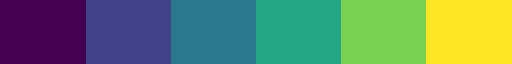

['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

In [53]:
# Define paleta de cores

# # alternativa A: definição manual das cores a partir de lista de cores em hex
coresViridis = ["#440154","#3b528b","#21918c","#5ec962","#fde725"]

# alternativa B: definição de cores utilizando palette do próprio matplotlib
# a paleta viridis é robusta para pessoas com daltonismo
vcmap = plt.get_cmap("viridis", 6) # um a mais do que o necessário para evitar utilizar o amarelo

# exibe o mapa de cores
display(vcmap)

# converte o mapa de cores em um vetor, para uso de cores individuais
coresViridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(6)] # extrai lista de cores em hex
display(coresViridis)

# define uma cor default
#corDefault = coresViridis[1]

# Carrega uma folha de estilos (opcional - questões estéticas)
plt.style.use("ggplot")

# Modifica mais alguns parâmetros gráficos (opcional - questões estéticas)
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "#f0f0f0")
plt.rc("axes", edgecolor="#cccccc", lw=0.1)

# plt.rcdefaults() # Restaura a configuração default

### 5.2 Margem Bruta

Métrica de análise para medir a porcentagem de lucro bruto que a companhia gera com cada serviço prestado ou produto vendido.

*Resultado Bruto / Receita de Vendas de Bens e/ou Serviços*



In [43]:
margem_bruta = pd.DataFrame()

for i in range(0,n_empresas):
  calculo_margem = pd.Series((df_dre.loc[lista_de_empresas[i],:].loc['Resultado Bruto'].iloc[-1])/(df_dre.loc[lista_de_empresas[i],:].loc['Receita de Venda de Bens e/ou Serviços'].iloc[-1]))
  margem_bruta = pd.concat([margem_bruta, calculo_margem], axis=1)

margem_bruta.columns = lista_de_empresas

margem_bruta

,3R PETROLEUM ÓLEO E GÁS S.A.,ENAUTA PARTICIPAÇÕES S.A.,PETRO RIO S.A.,PETRORECÔNCAVO S.A.
0,0.514902,0.493246,0.669001,0.484394


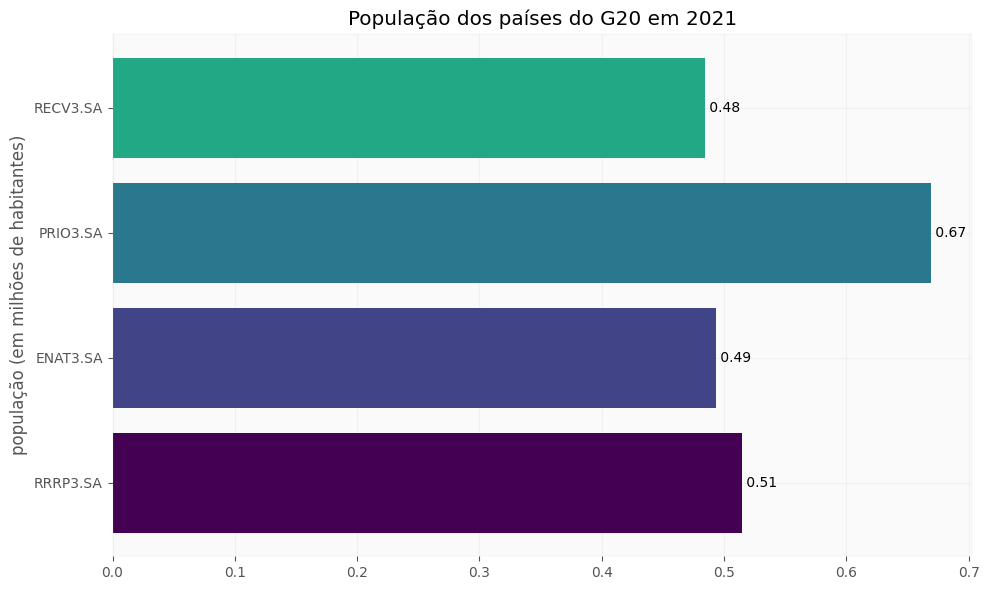

In [54]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 12 e altura 8 (em polegadas)
fig, ax = plt.subplots(figsize = (10, 6))

# Plota o gráfico de barras
b1 = ax.barh(y = tickers, width = margem_bruta.iloc[-1], color = coresViridis)

# Acrescenta os valores sobre as barras
for i, rect in enumerate(b1.patches):
    width = rect.get_width()
    ax.text(
        x = width,                             # posição x
        y = rect.get_y() + rect.get_height() / 2,   # posição y
        s = " {:.2f}".format(rect.get_width()),      # string com o valor
        ha = "left",                                # alinhamento na horizontal
        va = "center"                               # alinhamento na vertical
    )

# Acrescenta um título ao gráfico
plt.title('População dos países do G20 em 2021')

# Define os rótulos dos eixos
# plt.xlabel('país') # como já está no título, não é necessário
plt.ylabel('população (em milhões de habitantes)') # é importante esclarecer a unidade e a ordem de grandeza


# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 


# Exibe o gráfico
plt.show()